In [44]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)#Adjusts the configuration of the plots we will be plotting


In [45]:
df=pd.read_csv("movies.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Searching for missing data

In [46]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [47]:
for col in df.columns:
    print(df[col].isnull().value_counts(),"/n")

name
False    7668
Name: count, dtype: int64 /n
rating
False    7591
True       77
Name: count, dtype: int64 /n
genre
False    7668
Name: count, dtype: int64 /n
year
False    7668
Name: count, dtype: int64 /n
released
False    7666
True        2
Name: count, dtype: int64 /n
score
False    7665
True        3
Name: count, dtype: int64 /n
votes
False    7665
True        3
Name: count, dtype: int64 /n
director
False    7668
Name: count, dtype: int64 /n
writer
False    7665
True        3
Name: count, dtype: int64 /n
star
False    7667
True        1
Name: count, dtype: int64 /n
country
False    7665
True        3
Name: count, dtype: int64 /n
budget
False    5497
True     2171
Name: count, dtype: int64 /n
gross
False    7479
True      189
Name: count, dtype: int64 /n
company
False    7651
True       17
Name: count, dtype: int64 /n
runtime
False    7664
True        4
Name: count, dtype: int64 /n


In [48]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [49]:
#Change the datatype of columns
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [50]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [51]:
 df['yearcorrect'] = df['released'].astype(str).str.split().str[2]
# or df['yearcorrect'] = df['released'].str.extract(pat='([0-9]{4})').astype(int)


In [52]:
df["gross"]=df["gross"].where(df["gross"]>=0,0)
df=df.dropna()
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,0,3661,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378,Pryor Entertainment,120.0,2020
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78.0,2020


In [53]:
df.sort_values(by=["gross"],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,Party Line,R,Thriller,1988,October 1988 (United States),4.9,309.0,William Webb,Richard Brandes,Richard Hatch,United States,0,0,Westwind,91.0,(United
1405,Heart of Midnight,R,Drama,1988,"March 3, 1989 (United States)",5.4,1200.0,Matthew Chapman,Matthew Chapman,Jennifer Jason Leigh,United States,0,0,Virgin Vision,93.0,1989
1389,Not of This Earth,R,Comedy,1988,"May 20, 1988 (United States)",4.9,2200.0,Jim Wynorski,R.J. Robertson,Traci Lords,United States,210000,0,Miracle Pictures,81.0,1988
1367,Jack's Back,R,Crime,1988,"May 6, 1988 (United States)",5.9,3000.0,Rowdy Herrington,Rowdy Herrington,James Spader,United States,1000000,0,Cinema Group,97.0,1988


In [55]:
df=df.sort_values(by=["gross"],inplace=False,ascending=False)

In [56]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,Party Line,R,Thriller,1988,October 1988 (United States),4.9,309.0,William Webb,Richard Brandes,Richard Hatch,United States,0,0,Westwind,91.0,(United
1405,Heart of Midnight,R,Drama,1988,"March 3, 1989 (United States)",5.4,1200.0,Matthew Chapman,Matthew Chapman,Jennifer Jason Leigh,United States,0,0,Virgin Vision,93.0,1989
1389,Not of This Earth,R,Comedy,1988,"May 20, 1988 (United States)",4.9,2200.0,Jim Wynorski,R.J. Robertson,Traci Lords,United States,210000,0,Miracle Pictures,81.0,1988
1367,Jack's Back,R,Crime,1988,"May 6, 1988 (United States)",5.9,3000.0,Rowdy Herrington,Rowdy Herrington,James Spader,United States,1000000,0,Cinema Group,97.0,1988


In [24]:
#Budget high correlation
#Company high correlation


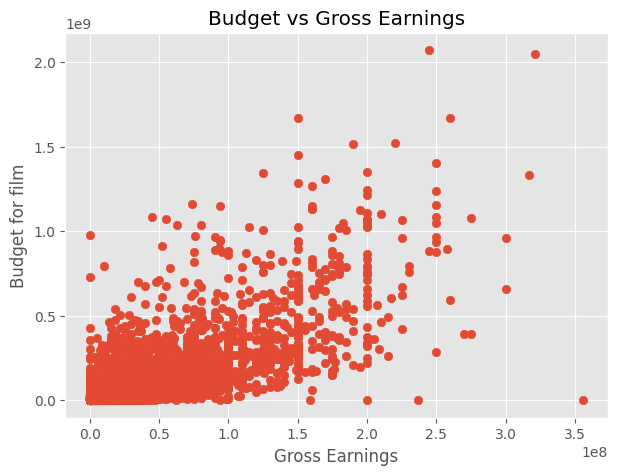

In [25]:
#Scatter plot with budget vs gross
plt.figure(figsize=(7,5))
plt.scatter(x=df["budget"],y=df["gross"])

plt.title("Budget vs Gross Earnings")
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')

plt.show()

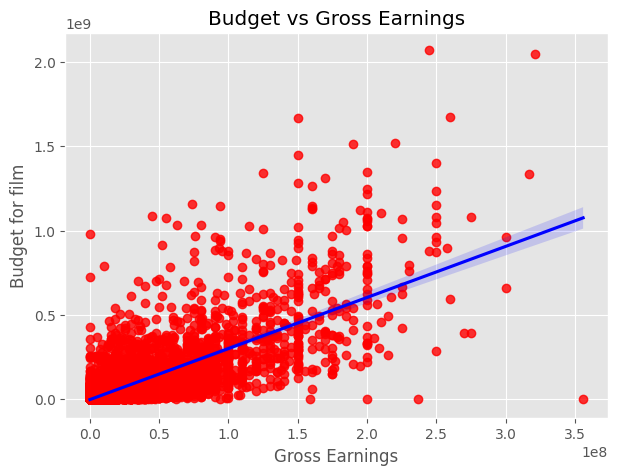

In [26]:
#Plot the budget vs gross using regression plot
plt.figure(figsize=(7,5))
sns.regplot(x="budget",y="gross",data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

plt.title("Budget vs Gross Earnings")
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')

plt.show()

In [19]:
#Finding the correlation
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.102859,0.226686,0.314683,0.258885,0.120743
score,0.102859,1.000000,0.412371,0.057153,0.171424,0.400937
votes,0.226686,0.412371,1.000000,0.485225,0.573817,0.309372
budget,0.314683,0.057153,0.485225,1.000000,0.687256,0.270024
gross,0.258885,0.171424,0.573817,0.687256,1.000000,0.203550
runtime,0.120743,0.400937,0.309372,0.270024,0.203550,1.000000


In [27]:
#The different type of correlation are pearson,kendall,spearman
#By default we use pearson

In [29]:
df.corr(method="pearson",numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.102859,0.226686,0.314683,0.272874,0.120743
score,0.102859,1.000000,0.412371,0.057153,0.187145,0.400937
votes,0.226686,0.412371,1.000000,0.485225,0.627484,0.309372
budget,0.314683,0.057153,0.485225,1.000000,0.747501,0.270024
gross,0.272874,0.187145,0.627484,0.747501,1.000000,0.232433
runtime,0.120743,0.400937,0.309372,0.270024,0.232433,1.000000


In [31]:
df.corr(method="spearman",numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.103917,0.482456,0.299624,0.321514,0.142804
score,0.103917,1.000000,0.434639,-0.005583,0.134318,0.401103
votes,0.482456,0.434639,1.000000,0.600699,0.749961,0.290742
budget,0.299624,-0.005583,0.600699,1.000000,0.713780,0.249217
gross,0.321514,0.134318,0.749961,0.713780,1.000000,0.254015
runtime,0.142804,0.401103,0.290742,0.249217,0.254015,1.000000


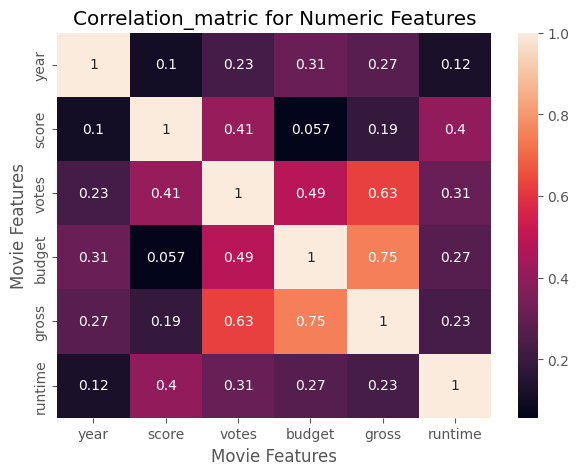

In [35]:
plt.figure(figsize=(7,5))
correlation_matrix=df.corr(method="pearson",numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation_matric for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [40]:
df_numerized=df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype("category")
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5074,5,0,2015,686,7.8,876000.0,1105,2517,505,55,245000000,2069521700,1502,138.0,37
7244,530,5,0,2018,185,8.4,897000.0,160,729,2189,55,321000000,2048359754,1568,149.0,40
7480,6111,4,2,2019,1464,6.9,222000.0,1430,1894,654,55,260000000,1670727580,2266,118.0,41
6653,2938,5,0,2015,1680,7.0,593000.0,507,3521,421,55,150000000,1670516444,2232,124.0,37
6043,5424,5,0,2012,2440,8.0,1300000.0,1491,2285,2189,55,220000000,1518815515,1568,143.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2057,6,3,1982,1938,7.3,7300.0,980,1262,1193,55,0,0,479,140.0,5
266,6796,4,9,1982,2580,3.6,1700.0,2735,1847,218,55,750000,0,502,83.0,4
324,6702,3,2,1982,3028,6.8,352.0,885,4445,28,55,0,0,110,78.0,4
55,6378,4,4,1980,2612,6.7,2900.0,1619,4148,2551,55,0,0,2192,91.0,2


In [57]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,Party Line,R,Thriller,1988,October 1988 (United States),4.9,309.0,William Webb,Richard Brandes,Richard Hatch,United States,0,0,Westwind,91.0,(United
1405,Heart of Midnight,R,Drama,1988,"March 3, 1989 (United States)",5.4,1200.0,Matthew Chapman,Matthew Chapman,Jennifer Jason Leigh,United States,0,0,Virgin Vision,93.0,1989
1389,Not of This Earth,R,Comedy,1988,"May 20, 1988 (United States)",4.9,2200.0,Jim Wynorski,R.J. Robertson,Traci Lords,United States,210000,0,Miracle Pictures,81.0,1988
1367,Jack's Back,R,Crime,1988,"May 6, 1988 (United States)",5.9,3000.0,Rowdy Herrington,Rowdy Herrington,James Spader,United States,1000000,0,Cinema Group,97.0,1988


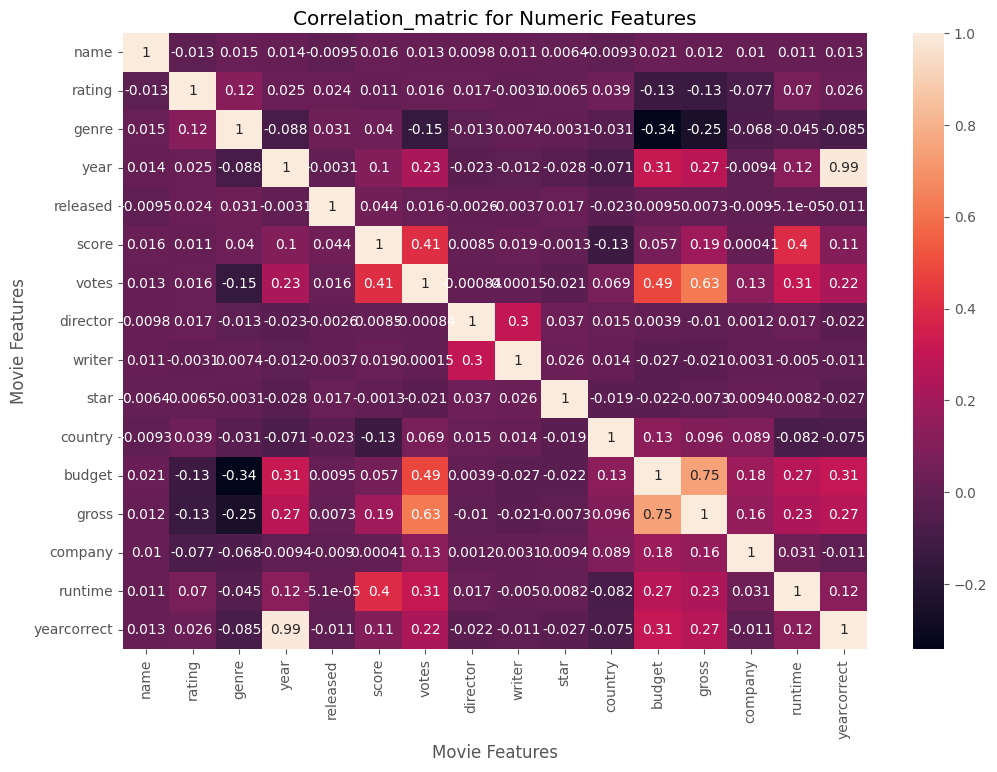

In [59]:

correlation_matrix=df_numerized.corr(method="pearson",numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation_matric for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [60]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.012550,0.015062,0.013641,-0.009465,0.015654,0.013315,0.009792,0.010514,0.006384,-0.009323,0.021046,0.011681,0.010095,0.011340,0.012758
rating,-0.012550,1.000000,0.117753,0.024596,0.024416,0.011299,0.016108,0.016981,-0.003094,0.006475,0.038512,-0.126947,-0.134582,-0.076939,0.069988,0.025974
genre,0.015062,0.117753,1.000000,-0.087680,0.031494,0.039653,-0.148207,-0.013124,0.007413,-0.003115,-0.031004,-0.341894,-0.248358,-0.068484,-0.044540,-0.084738
year,0.013641,0.024596,-0.087680,1.000000,-0.003098,0.102859,0.226686,-0.023254,-0.012152,-0.027971,-0.070711,0.314683,0.272874,-0.009398,0.120743,0.991923
released,-0.009465,0.024416,0.031494,-0.003098,1.000000,0.044072,0.016417,-0.002582,-0.003672,0.017295,-0.023086,0.009490,0.007268,-0.009044,-0.000051,-0.010600
score,0.015654,0.011299,0.039653,0.102859,0.044072,1.000000,0.412371,0.008487,0.019279,-0.001330,-0.129401,0.057153,0.187145,0.000414,0.400937,0.107973
votes,0.013315,0.016108,-0.148207,0.226686,0.016417,0.412371,1.000000,-0.000837,0.000150,-0.021215,0.069354,0.485225,0.627484,0.129516,0.309372,0.222416
director,0.009792,0.016981,-0.013124,-0.023254,-0.002582,0.008487,-0.000837,1.000000,0.297659,0.037225,0.014758,0.003922,-0.010451,0.001178,0.017358,-0.021942
writer,0.010514,-0.003094,0.007413,-0.012152,-0.003672,0.019279,0.000150,0.297659,1.000000,0.026239,0.014268,-0.027218,-0.020623,0.003140,-0.004950,-0.010506
star,0.006384,0.006475,-0.003115,-0.027971,0.017295,-0.001330,-0.021215,0.037225,0.026239,1.000000,-0.018733,-0.022294,-0.007345,0.009362,0.008246,-0.027185


In [67]:
pd.set_option('display.max_rows',None)

In [70]:
#unstacking
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.012550
             genre          0.015062
             year           0.013641
             released      -0.009465
             score          0.015654
             votes          0.013315
             director       0.009792
             writer         0.010514
             star           0.006384
             country       -0.009323
             budget         0.021046
             gross          0.011681
             company        0.010095
             runtime        0.011340
             yearcorrect    0.012758
rating       name          -0.012550
             rating         1.000000
             genre          0.117753
             year           0.024596
             released       0.024416
             score          0.011299
             votes          0.016108
             director       0.016981
             writer        -0.003094
             star           0.006475
             country        0.038512
 

In [71]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.341894
genre        budget        -0.341894
gross        genre         -0.248358
genre        gross         -0.248358
             votes         -0.148207
votes        genre         -0.148207
rating       gross         -0.134582
gross        rating        -0.134582
score        country       -0.129401
country      score         -0.129401
budget       rating        -0.126947
rating       budget        -0.126947
year         genre         -0.087680
genre        year          -0.087680
yearcorrect  genre         -0.084738
genre        yearcorrect   -0.084738
runtime      country       -0.081965
country      runtime       -0.081965
company      rating        -0.076939
rating       company       -0.076939
country      yearcorrect   -0.075442
yearcorrect  country       -0.075442
year         country       -0.070711
country      year          -0.070711
genre        company       -0.068484
company      genre         -0.068484
genre        runtime       -0.044540
r

In [66]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross        votes          0.627484
votes        gross          0.627484
gross        budget         0.747501
budget       gross          0.747501
year         yearcorrect    0.991923
yearcorrect  year           0.991923
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#Votes and budget has the highest correlation to gross earnings
#Company and gross earnigns have a low correlation